In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

In [40]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        linearr = line.strip().split()
        dataMat.append([1.0, float(linearr[0]), float(linearr[1])])
        labelMat.append(int(linearr[2]))
    return dataMat, labelMat

In [41]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))


In [42]:
def gradAssent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = labelMat-h
        weights = weights+alpha*dataMatrix.transpose()*error
    return weights


In [43]:
dataArr, labelMat = loadDataSet()
weights = gradAssent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [50]:
def plotBestFit(wei):
    weights = wei
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xCord1 = []
    yCord1 = []
    xCord2 = []
    yCord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xCord1.append(dataArr[i, 1])
            yCord1.append(dataArr[i, 2])
        else:
            xCord2.append(dataArr[i, 1])
            yCord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xCord1, yCord1, s=30, c='red', marker='s')
    ax.scatter(xCord2, yCord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

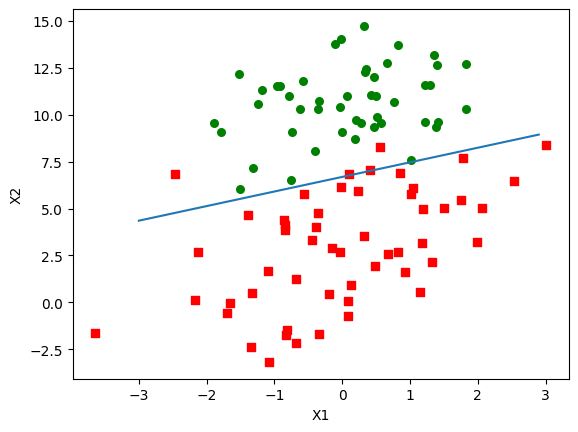

In [47]:
plotBestFit(weights)

In [48]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        errors = classLabels[i] - h
        weights = weights+alpha*errors*dataMatrix[i]
    return weights

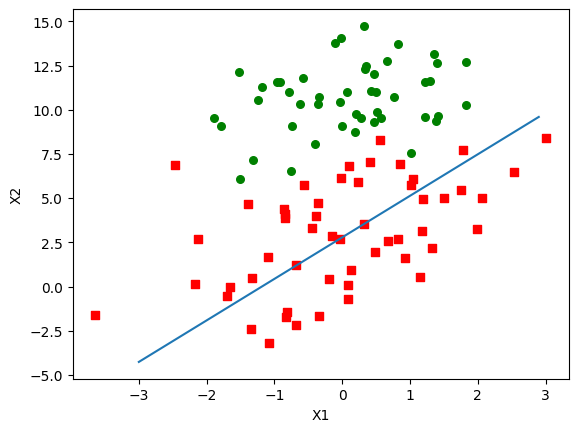

In [51]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

In [55]:
def stocGradAscent1(dataMatrix, classLables, numIter = 150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randindex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randindex]*weights))
            error = classLables[randindex] - h
            weights = weights+alpha*error*dataMatrix[randindex]
            del(dataIndex[randindex])
    return weights

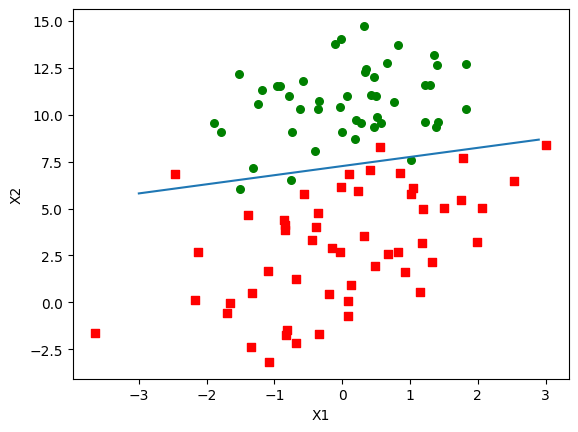

In [58]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat, 5000)
plotBestFit(weights)

In [59]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [61]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet =[]
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        linearr = []
        for i in range(21):
            linearr.append(float(currLine[i]))
        trainingSet.append(linearr)
        trainingLabels.append(float(currLine[21]))
    trainingWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        linearr = []
        for i in range(21):
            linearr.append(float(currLine[i]))
        if int(classifyVector(array(linearr), trainingWeights)) != int(currLine[21]):
            errorCount+=1
    errorRate = (float(errorCount)/numTestVec)
    print(f'Error rate of this thest is {errorRate}')
    return errorRate



In [62]:
def multiTest():
    numTest = 10
    errorSum = 0.0
    for k in range(numTest):
        errorSum+=colicTest()
    print(f'after {numTest} iterations the average error rate is {errorSum/float(numTest)}')

In [63]:
multiTest()

C:\Users\harsh\AppData\Local\Temp\ipykernel_20148\213373500.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-inX))


Error rate of this thest is 0.417910447761194
Error rate of this thest is 0.44776119402985076
Error rate of this thest is 0.31343283582089554
Error rate of this thest is 0.4626865671641791
Error rate of this thest is 0.3582089552238806
Error rate of this thest is 0.373134328358209
Error rate of this thest is 0.34328358208955223
Error rate of this thest is 0.40298507462686567
Error rate of this thest is 0.43283582089552236
Error rate of this thest is 0.373134328358209
after 10 iterations the average error rate is 0.3925373134328358
